## 1. Importing required packages and read the prepared data

In [1]:
import pandas as pd
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_palette('coolwarm')
sns.set(rc= {'image.cmap': 'coolwarm'})
rcParams['figure.figsize'] = 11.7,8.27
sns.set(rc={'figure.figsize':(11.7,8.27)})



df= pd.read_csv("data/OnlineRetail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [2]:
# checking the shape of the data
df.shape

(541909, 8)

## 2. Set date to datetime format

In [3]:
import datetime as dt
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate']).dt.date

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


## Explore the Dataset

<AxesSubplot:xlabel='InvoiceDate'>

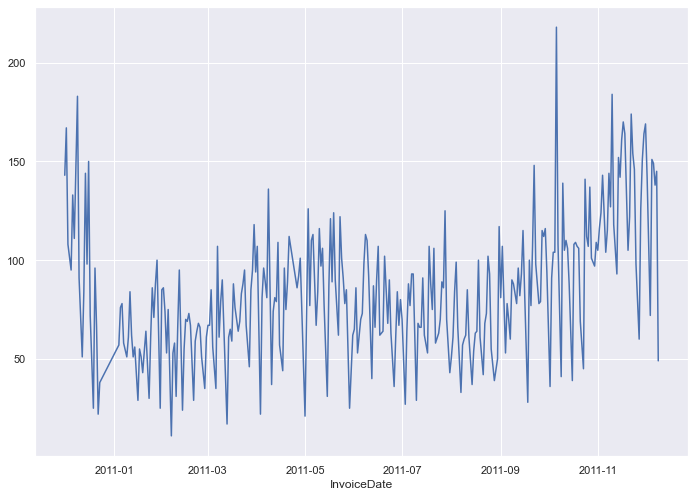

In [5]:
df.groupby('InvoiceDate').InvoiceNo.nunique().plot()

In [6]:
print(df['CustomerID'].nunique())
print(df['InvoiceNo'].nunique())

4372
25900


let's count unique transactions by customer and then plot the frequncy of these values. as you can see many of customers just did one sigle transaction.

<AxesSubplot:ylabel='Frequency'>

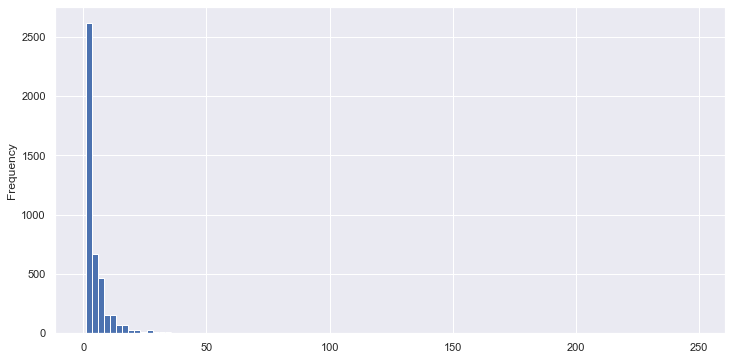

In [8]:
df.groupby('CustomerID').agg(
    occurrenece=('InvoiceNo','nunique')
    ).reset_index()['occurrenece'].plot(kind='hist',bins=100,color='b',figsize=(12,6))

<AxesSubplot:ylabel='Frequency'>

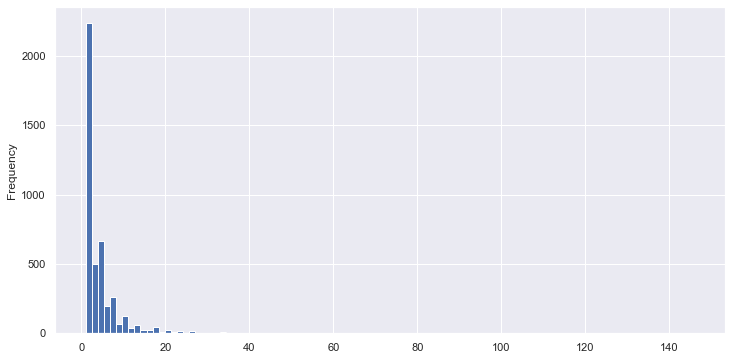

In [9]:
df.groupby(['CustomerID']).agg(
    occurrence=('InvoiceDate','nunique')
    ).reset_index()['occurrence'].plot(kind='hist',bins=100,color='b',figsize=(12,6))

In [15]:
df_dist=df[['CustomerID','InvoiceDate']].drop_duplicates()


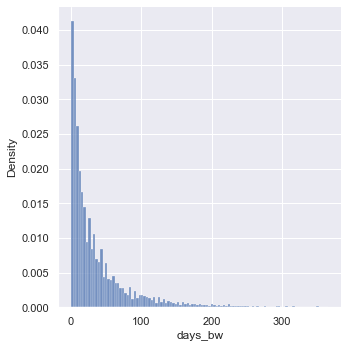

In [16]:
df_dist['previous_InvoiceDate'] = df_dist.groupby(['CustomerID'])['InvoiceDate'].shift()
df_dist['days_bw'] = df2['InvoiceDate'] - df_dist['previous_InvoiceDate']
df_dist['days_bw'] = df_dist['days_bw'].apply(lambda x: x.days)
sns.displot(x=df_dist['days_bw'],stat='density')

## 3. Cleaning and selecting only required column

## 4. Importing lifetimes package to view our data into RFM metrics

In [20]:
import lifetimes
df['Price'] = df['Quantity']* df['UnitPrice']
current_date=df['InvoiceDate'].max()
metrics_df = lifetimes.utils.summary_data_from_transaction_data(df, 'CustomerID','InvoiceDate', monetary_value_col = 'Price', observation_period_end = current_date)
metrics_df.head(10)

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000
12352.0,6.0,260.0,296.0,208.151667
12353.0,0.0,0.0,204.0,0.000000
12354.0,0.0,0.0,232.0,0.000000
12355.0,0.0,0.0,214.0,0.000000


In [21]:
metrics_df.describe()

,frequency,recency,T,monetary_value
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,3.413541,133.723010,225.304209,213.254316
std,6.674343,133.000474,118.384168,372.810217
min,0.000000,0.000000,0.000000,-3528.340000
25%,0.000000,0.000000,115.000000,0.000000
50%,1.000000,98.000000,253.000000,148.955000
75%,4.000000,256.000000,331.000000,304.942500
max,145.000000,373.000000,373.000000,8866.081538


In [26]:
holdout_days = 90
calibration_end_date= current_date - dt.timedelta(days=holdout_days)
metrics_cal_df=lifetimes.utils.calibration_and_holdout_data(
    df,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date,
    calibration_period_end=calibration_end_date,
    freq='D'    
)
metrics_cal_df.head(10)

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,235.0,0.0,90.0
12347.0,4.0,238.0,277.0,2.0,90.0
12348.0,2.0,110.0,268.0,1.0,90.0
12350.0,0.0,0.0,220.0,0.0,90.0
12352.0,3.0,34.0,206.0,3.0,90.0
12353.0,0.0,0.0,114.0,0.0,90.0
12354.0,0.0,0.0,142.0,0.0,90.0
12355.0,0.0,0.0,124.0,0.0,90.0
12356.0,1.0,80.0,235.0,1.0,90.0


In [27]:
metrics_cal_df.describe()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.0
mean,2.677608,90.587046,185.041618,1.502345,90.0
std,5.222838,96.077761,80.771943,2.495318,0.0
min,0.000000,0.000000,1.000000,0.000000,90.0
25%,0.000000,0.000000,125.000000,0.000000,90.0
50%,1.000000,59.500000,197.000000,1.000000,90.0
75%,3.000000,175.000000,268.000000,2.000000,90.0
max,93.000000,282.000000,283.000000,52.000000,90.0


In [28]:
# remove customers with no repeats (complete dataset)
filtered_df = metrics_df[metrics_df['frequency'] > 0]

## remove customers with no repeats in calibration period
filtered_cal_df = metrics_cal_df[metrics_cal_df['frequency_cal'] > 0]

## 6. Fitting the model

In [30]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(filtered_cal_df['frequency_cal'],filtered_cal_df['recency_cal'],filtered_cal_df['T_cal'])
print(bgf)
bgf.summary

<lifetimes.BetaGeoFitter: fitted with 2163 subjects, a: 0.09, alpha: 95.54, b: 0.55, r: 2.28>


,coef,se(coef),lower 95% bound,upper 95% bound
r,2.275392,0.103232,2.073058,2.477726
alpha,95.542878,4.737910,86.256574,104.829182
a,0.093539,0.015787,0.062596,0.124482
b,0.547570,0.105325,0.341133,0.754007


In [31]:
frequency_holdout_predicted = bgf.predict(
    filtered_cal_df['duration_holdout'],
    filtered_cal_df['frequency_cal'],
    filtered_cal_df['recency_cal'],
    filtered_cal_df['T_cal'])

In [32]:
frequency_holdout_actual = filtered_cal_df['frequency_holdout']

In [33]:
import numpy as np

def score_model(actuals, predicted, metric='mse'):
  # make sure metric name is lower case
  metric = metric.lower()
  
  # Mean Squared Error and Root Mean Squared Error
  if metric=='mse' or metric=='rmse':
    val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    if metric=='rmse':
        val = np.sqrt(val)
  
  # Mean Absolute Error
  elif metric=='mae':
    np.sum(np.abs(actuals-predicted))/actuals.shape[0]
  
  else:
    val = None
  
  return val

# score the model
print('MSE: {0}'.format(score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')))

MSE: 4.027424975706059


<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

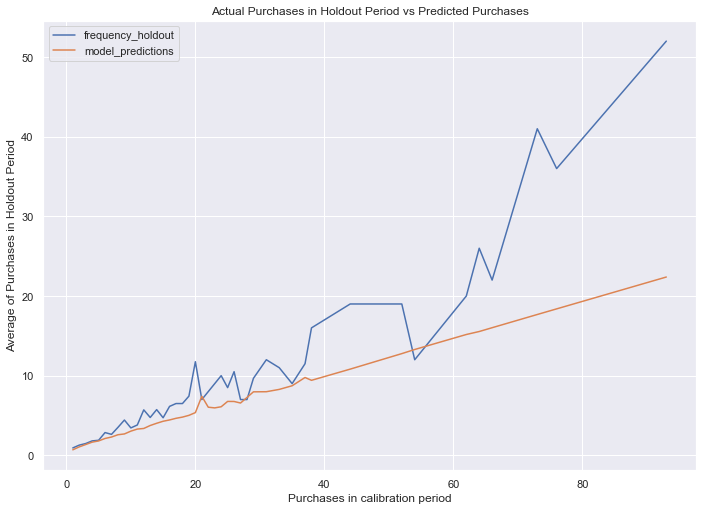

In [35]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(
  bgf, 
  filtered_cal_df, 
  n=90, 
  )

<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Time since user made last purchase', ylabel='Average of Purchases in Holdout Period'>

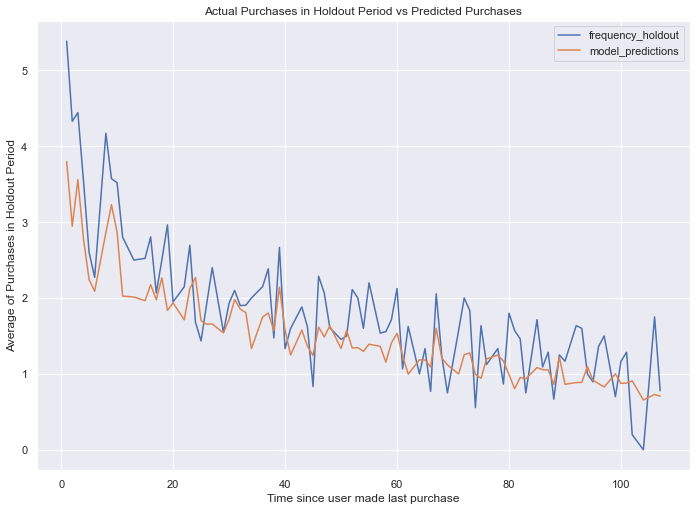

In [37]:
plot_calibration_purchases_vs_holdout_purchases(
  bgf, 
  filtered_cal_df,
  kind='time_since_last_purchase', 
  n=90, 
  )

In [39]:
filtered_df['prob_alive']=bgf.conditional_probability_alive(
    filtered_df['frequency'], 
    filtered_df['recency'], 
    filtered_df['T']
    )

filtered_df.head(10)

,frequency,recency,T,monetary_value,prob_alive
CustomerID,,,,,
12347.0,6.0,365.0,367.0,599.701667,0.982823
12348.0,3.0,283.0,358.0,301.480000,0.913008
12352.0,6.0,260.0,296.0,208.151667,0.963896
12356.0,2.0,303.0,325.0,269.905000,0.929323
12358.0,1.0,149.0,150.0,683.200000,0.852424
12359.0,5.0,324.0,331.0,1139.606000,0.977326
12360.0,2.0,148.0,200.0,789.240000,0.878541
12362.0,12.0,292.0,295.0,389.623333,0.991038
12363.0,1.0,133.0,242.0,252.900000,0.620062


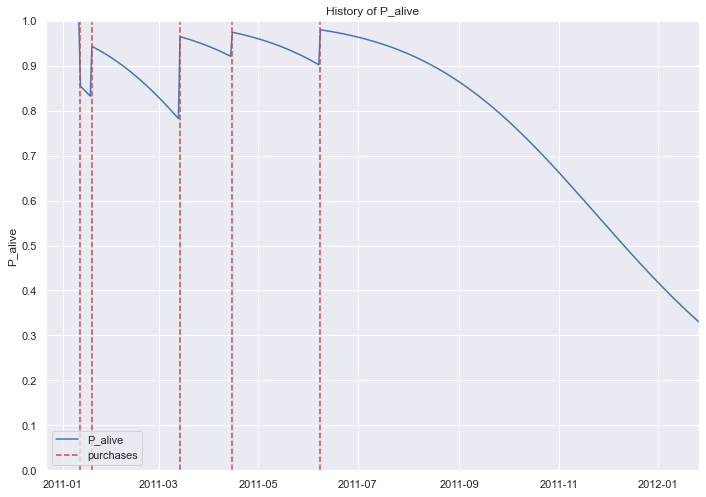

In [46]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

# clear past visualization instructions
plt.clf()

# customer of interest
CustomerID = 12383

# grab customer's metrics and transaction history
filtered_cal_df=filtered_cal_df.reset_index()
cmetrics_pd = filtered_cal_df[filtered_cal_df['CustomerID']==CustomerID]
trans_history = df.loc[df['CustomerID'] == CustomerID]

# calculate age at end of dataset
days_since_birth = 400

# plot history of being "alive"
plot_history_alive(
  bgf, 
  days_since_birth, 
  trans_history, 
  'InvoiceDate'
  )

display()

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

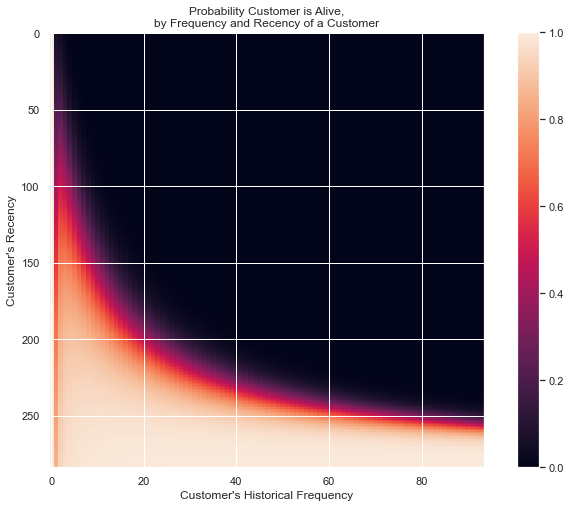

In [47]:
from lifetimes.plotting import plot_probability_alive_matrix

# set figure size
plt.subplots(figsize=(12, 8))

plot_probability_alive_matrix(bgf)


## 7. Visualizing the frequency/recency metrics

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 30 Units of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

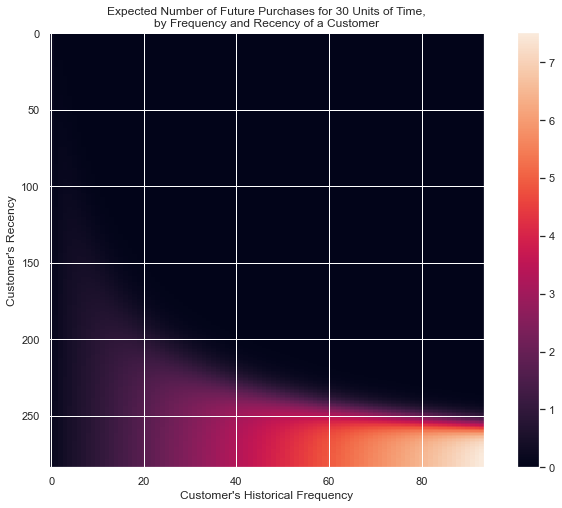

In [49]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf,T=30)

In [50]:
filtered_df['purchases_next30days']=(
  bgf.conditional_expected_number_of_purchases_up_to_time(
    30, 
    filtered_df['frequency'], 
    filtered_df['recency'], 
    filtered_df['T']
    )
  )

filtered_df.head(10)

,frequency,recency,T,monetary_value,prob_alive,purchases_next30days
CustomerID,,,,,,
12347.0,6.0,365.0,367.0,599.701667,0.982823,0.525346
12348.0,3.0,283.0,358.0,301.480000,0.913008,0.316953
12352.0,6.0,260.0,296.0,208.151667,0.963896,0.608219
12356.0,2.0,303.0,325.0,269.905000,0.929323,0.281626
12358.0,1.0,149.0,150.0,683.200000,0.852424,0.336454
12359.0,5.0,324.0,331.0,1139.606000,0.977326,0.497766
12360.0,2.0,148.0,200.0,789.240000,0.878541,0.377873
12362.0,12.0,292.0,295.0,389.623333,0.991038,1.082186
12363.0,1.0,133.0,242.0,252.900000,0.620062,0.178668


## 9. Predict expected deposit and rank the client in the next period

In [30]:
t = 1
data['predicted_deposit'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])
data.sort_values(by = 'predicted_deposit').tail(5)

,frequency,recency,T,monetary_value,predicted_deposit
login_id,,,,,
14606.0,88.0,372.0,373.0,135.890114,0.209731
15311.0,89.0,373.0,373.0,677.729438,0.212099
17841.0,111.0,372.0,373.0,364.452162,0.264180
12748.0,113.0,373.0,373.0,298.360885,0.268915
14911.0,131.0,372.0,373.0,1093.661679,0.311527


## 10. Assessing model fit

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

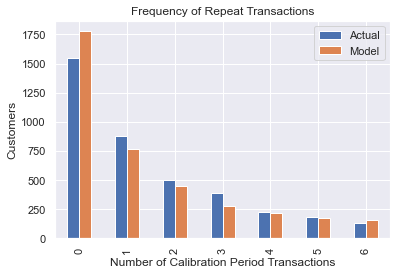

In [31]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [60]:
from lifetimes import GammaGammaFitter

clv_df = metrics_df[(metrics_df['frequency']>0) & (metrics_df['monetary_value']>0)]
ggf = GammaGammaFitter(penalizer_coef = 0.0)
ggf.fit(clv_df['frequency'],
        clv_df['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2796 subjects, p: 1.60, q: 3.59, v: 553.51>


In [61]:
print(ggf.conditional_expected_average_profit(
        clv_df['frequency'],
        clv_df['monetary_value']
    ).head(10))


CustomerID
12347.0    544.801062
12348.0    315.531270
12352.0    236.518746
12356.0    301.970378
12358.0    471.915541
12359.0    944.253705
12360.0    588.847272
12362.0    383.902541
12363.0    307.717271
12364.0    268.944370
dtype: float64


In [62]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        clv_df['frequency'],
        clv_df['monetary_value']
    ).mean(),
    clv_df[clv_df['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 348.4762177527137, Average profit: 339.2490770584033
